#  Human Resources Dataset Analysis - Week 1
## Data Model Building, Data Cleaning and Preprocessing

---

### 📋 Project Overview
This notebook demonstrates the complete process of:
1. **Data Exploration** - Understanding the dataset structure
2. **Data Model Design** - Creating relationships between tables
3. **Data Cleaning** - Handling missing values, duplicates, and inconsistencies
4. **Data Preprocessing** - Feature engineering and data transformation

---

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns

#classification
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


# Load Data

In [ ]:
print("\n [Step 1] Loading all 5 datasets...")
print("="*80)

employee_df = pd.read_csv('Employee.csv')
education_df = pd.read_csv('EducationLevel.csv')
performance_df = pd.read_csv('PerformanceRating.csv')
rating_df = pd.read_csv('RatingLevel.csv')
satisfied_df = pd.read_csv('SatisfiedLevel.csv')

print(' Original Dataset Shapes:')
print(f'  Employee: {employee_df.shape}')
print(f'  PerformanceRating: {performance_df.shape}')
print(f'  EducationLevel: {education_df.shape}')
print(f'  RatingLevel: {rating_df.shape}')
print(f'  SatisfiedLevel: {satisfied_df.shape}')




 [Step 1] Loading all 5 datasets...
 Original Dataset Shapes:
  Employee: (1470, 23)
  PerformanceRating: (6709, 11)
  EducationLevel: (5, 2)
  RatingLevel: (5, 2)
  SatisfiedLevel: (5, 2)


In [ ]:
print("Checking for Orphan Performance Records (Employees in Performance but not in Employee):")
orphan_ids = performance_df[~performance_df['EmployeeID'].isin(employee_df['EmployeeID'])]['EmployeeID'].unique()

if len(orphan_ids) > 0:
    print(f"  Found {len(orphan_ids)} orphan EmployeeIDs in PerformanceRating.")
else:
    print(" Good: No orphan records found. All performance reviews map to an existing employee.")

Checking for Orphan Performance Records (Employees in Performance but not in Employee):
 Good: No orphan records found. All performance reviews map to an existing employee.


# Data Exploration
## Employees file

In [ ]:
print(' Employee Dataset Overview')
print('='*80)
employee_df.info()
print('\n')

 Employee Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary       

In [ ]:
print("\n Employee Data Sample (Head):")
employee_df.head()


 Employee Data Sample (Head):


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [ ]:
print("\n Employee Statistical Summary (Describe):")
employee_df.describe()


 Employee Statistical Summary (Describe):


,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


## Performance file

In [ ]:
print(' Performance Rating Dataset Overview')
print('='*80)
performance_df.info()

 Performance Rating Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [ ]:
print("\n Performance Rating Data Sample (Head):")
performance_df.head()


 Performance Rating Data Sample (Head):


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


# Lookup Tables

In [ ]:
print(' Education Levels:')
display(education_df)

print('\n Rating Levels:')
display(rating_df)

print('\n Satisfaction Levels:')
display(satisfied_df)

 Education Levels:


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate



 Rating Levels:


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond



 Satisfaction Levels:


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


# Understanding Relationships

In [ ]:
print('Data Model Relationships (Validation)')
print('='*80)

# 1. Employee to EducationLevel
print('\n Employee → EducationLevel (Many-to-One)')
print(f'   Education values in Employee: {sorted(employee_df["Education"].unique())}')
print(f'   EducationLevelID in EducationLevel: {sorted(education_df["EducationLevelID"].unique())}')

# 2. Employee to PerformanceRating
print('\n Employee → PerformanceRating (One-to-Many)')
print(f'   Unique employees in Employee: {employee_df["EmployeeID"].nunique()} (e.g., 1470)')
print(f'   Unique employees in PerformanceRating: {performance_df["EmployeeID"].nunique()} (e.g., 1470)')
perf_counts = performance_df.groupby('EmployeeID').size()
print(f'   Average ratings per employee: {perf_counts.mean():.2f} <-- THIS IS THE KEY')
print(f'   Min ratings: {perf_counts.min()}, Max ratings: {perf_counts.max()} (Confirms 1-to-Many)')

# 3. PerformanceRating to RatingLevel
print('\n PerformanceRating → RatingLevel (Many-to-One)')
print(f'   SelfRating values: {sorted(performance_df["SelfRating"].unique())}')
print(f'   ManagerRating values: {sorted(performance_df["ManagerRating"].unique())}')
print(f'   RatingID in RatingLevel: {sorted(rating_df["RatingID"].unique())}')

# 4. PerformanceRating to SatisfiedLevel
print('\n PerformanceRating → SatisfiedLevel (Many-to-One)')
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction',
                     'RelationshipSatisfaction', 'WorkLifeBalance']
for col in satisfaction_cols:
    print(f'   {col}: {sorted(performance_df[col].unique())}')

Data Model Relationships (Validation)

 Employee → EducationLevel (Many-to-One)
   Education values in Employee: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   EducationLevelID in EducationLevel: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

 Employee → PerformanceRating (One-to-Many)
   Unique employees in Employee: 1470 (e.g., 1470)
   Unique employees in PerformanceRating: 1280 (e.g., 1470)
   Average ratings per employee: 5.24 <-- THIS IS THE KEY
   Min ratings: 1, Max ratings: 10 (Confirms 1-to-Many)

 PerformanceRating → RatingLevel (Many-to-One)
   SelfRating values: [np.int64(3), np.int64(4), np.int64(5)]
   ManagerRating values: [np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   RatingID in RatingLevel: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

 PerformanceRating → SatisfiedLevel (Many-to-One)
   EnvironmentSatisfaction: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   JobSatisfaction:

### Entity Relationship Diagram (ERD)

```
┌─────────────────────┐
│   Employee (1470)   │  ← Main Table ┌──────────────────┐   (N:1)  
│                     │               |  EducationLevel  │
|  - EmployeeID (PK)  |───────────────│   (5 rows)       │
|                     |               └──────────────────┘
│  - Education (FK)   │
└──────────┬──────────┘
           │
           │ 1:N (One-to-Many)
           │
           ▼
┌─────────────────────┐
│ PerformanceRating   │
│    (6709 records)   │
│  - PerformanceID(PK)│
│  - EmployeeID (FK)  │
│  - SelfRating (FK)  │
│  - ManagerRating(FK)│
│  - *Satisfaction(FK)│
└──────────┬──────────┘
           │
           ├──────────────────┐
           │                  │                                    
           ▼                  ▼                                    
  ┌──────────────┐  ┌──────────────┐  
  │ RatingLevel  │  │SatisfiedLevel│  
  │  (5 rows)    │  │  (5 rows)    │     
  └──────────────┘  └──────────────┘  
```

# Data Cleaning
## Missing values

In [ ]:
print(' Missing Values Check')
print('='*80)

datasets = {
    'Employee': employee_df,
    'EducationLevel': education_df,
    'PerformanceRating': performance_df,
    'RatingLevel': rating_df,
    'SatisfiedLevel': satisfied_df
}

for name, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f'\n {name} - Missing values found:')
        print(missing[missing > 0])
    else:
        print(f' {name} - No missing values')

print("\n This check is before merging. We will check again after merging.")

 Missing Values Check
 Employee - No missing values
 EducationLevel - No missing values
 PerformanceRating - No missing values
 RatingLevel - No missing values
 SatisfiedLevel - No missing values

 This check is before merging. We will check again after merging.


# Duplicates

In [ ]:
print(' Duplicates Check')
print('='*80)

# Check Employee duplicates
emp_duplicates = employee_df['EmployeeID'].duplicated().sum()
print(f'Employee (EmployeeID) duplicates: {emp_duplicates}')

# Check Performance duplicates
perf_duplicates = performance_df['PerformanceID'].duplicated().sum()
print(f'PerformanceRating (PerformanceID) duplicates: {perf_duplicates}')

if emp_duplicates == 0 and perf_duplicates == 0:
    print('\n No duplicate Primary Keys found!')
else:
    print('\n WARNING: Duplicate Primary Keys found.')

 Duplicates Check
Employee (EmployeeID) duplicates: 0
PerformanceRating (PerformanceID) duplicates: 0

 No duplicate Primary Keys found!


# Convert Date Type

In [ ]:
# Convert HireDate
print(f'HireDate before: {employee_df["HireDate"].dtype}')
employee_df['HireDate'] = pd.to_datetime(employee_df['HireDate'])
print(f'HireDate after: {employee_df["HireDate"].dtype}')

# Convert ReviewDate
print(f'\nReviewDate before: {performance_df["ReviewDate"].dtype}')
performance_df['ReviewDate'] = pd.to_datetime(performance_df['ReviewDate'])
print(f'ReviewDate after: {performance_df["ReviewDate"].dtype}')

print('\n Date conversion completed!')

HireDate before: object
HireDate after: datetime64[ns]

ReviewDate before: object
ReviewDate after: datetime64[ns]

 Date conversion completed!


# Data validation

In [ ]:
print(' Data Validation (Numerical Ranges)')
print('='*80)

# Age validation
print('\n Age:')
age_min = employee_df["Age"].min()
print(f'   Min: {age_min}, Max: {employee_df["Age"].max()}, Mean: {employee_df["Age"].mean():.1f}')

# Salary validation
print('\n Salary:')
salary_min = employee_df["Salary"].min()
print(f'   Min: ${salary_min:,}, Max: ${employee_df["Salary"].max():,}, Mean: ${employee_df["Salary"].mean():,.0f}')

# Distance validation
print('\n Distance from Home:')
print(f'   Min: {employee_df["DistanceFromHome (KM)"].min()} km, Max: {employee_df["DistanceFromHome (KM)"].max()} km, Mean: {employee_df["DistanceFromHome (KM)"].mean():.1f} km')

if age_min < 18 or salary_min <= 0:
     print('\n WARNING: Illogical data found (e.g., Age < 18 or Salary <= 0).')
else:
    print('\n All values appear to be within logical ranges!')

 Data Validation (Numerical Ranges)

 Age:
   Min: 18, Max: 51, Mean: 29.0

 Salary:
   Min: $20,387, Max: $547,204, Mean: $112,956

 Distance from Home:
   Min: 1 km, Max: 45 km, Mean: 22.5 km

 All values appear to be within logical ranges!


# solve (1 to n) issue

In [ ]:
print("\n Get Latest Performance Review")
print("="*80)

snapshot_date = performance_df['ReviewDate'].max()
print(f"  Snapshot date defined as: {snapshot_date.date()} (Latest ReviewDate)")

# We only want the most recent review for each employee.
print("  Filtering for latest performance review per employee...")
performance_df.sort_values(by=['EmployeeID', 'ReviewDate'], ascending=[True, False], inplace=True)
latest_performance_df = performance_df.drop_duplicates(subset='EmployeeID', keep='first')
print(f"  Performance data shape changed from {performance_df.shape} to {latest_performance_df.shape} (now 1-to-1)")


 Get Latest Performance Review
  Snapshot date defined as: 2022-12-31 (Latest ReviewDate)
  Filtering for latest performance review per employee...
  Performance data shape changed from (6709, 11) to (1280, 11) (now 1-to-1)


# Merging Employees and performance

In [ ]:
print("\n Merging & Final Prep for ML...")
print("="*80)
# 1. Merge (Left Join to keep everyone)
final_df = pd.merge(
    employee_df,
    latest_performance_df,
    on='EmployeeID',
    how='left'
)
# 2. Handling Missing Values
# Fill missing ratings with 3 (Neutral) instead of dropping them
cols_to_fill = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction',
                'WorkLifeBalance', 'SelfRating', 'ManagerRating']
# Check if columns exist before filling
for col in cols_to_fill:
    if col in final_df.columns:
        final_df[col].fillna(3, inplace=True)
print(" Missing values imputed with 3 (Neutral) for ML.")
# 3. Clean Strings
# Using 'final_df'
for col in final_df.select_dtypes(include=['object']).columns:
    final_df[col] = final_df[col].str.strip()

# 4. Target Encoding (Must be 0/1 for Logistic Regression)
final_df['Attrition_Target'] = final_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Created 'Attrition_Target' (0/1) column.")

# 5.Labels (for Visualization)
sat_map = {1: 'Very Dissatisfied', 2: 'Dissatisfied', 3: 'Neutral', 4: 'Satisfied', 5:'Very Satisfied'}
rating_map = {1: 'Unacceptable', 2: 'Needs Imp.', 3: 'Meets Exp.', 4: 'Exceeds Exp.', 5: 'Above & Beyond'}

final_df['JobSat_Label'] = final_df['JobSatisfaction'].map(sat_map)
final_df['MgrRating_Label'] = final_df['ManagerRating'].map(rating_map)

# 5. Binning (Grouping) for Charts
# Grouping Age into categories
final_df['Age_Group'] = pd.cut(
    final_df['Age'],
    bins=[18, 25, 35, 45, 60],
    labels=['(18-25)', '(26-35)', '(36-45)', '(46+)']
)
final_df['Salary_Bin'] = pd.qcut(final_df['Salary'], q=3, labels=['Low Salary', 'Avg Salary', 'High Salary'])

print("Created text labels and groups for Visualization.")
# 5. Save
print("\n Saving the cleaned, ML-ready dataset...")
final_df.to_csv('final_analytical_dataset.csv', index=False)

print("\n" + "="*80)
print(" PHASE 1 COMPLETED SUCCESSFULLY!")
print(f" Final Shape: {final_df.shape}")


 Merging & Final Prep for ML...
 Missing values imputed with 3 (Neutral) for ML.
Created 'Attrition_Target' (0/1) column.
Created text labels and groups for Visualization.

 Saving the cleaned, ML-ready dataset...

 PHASE 1 COMPLETED SUCCESSFULLY!
 Final Shape: (1470, 38)


/tmp/ipython-input-9652359.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[col].fillna(3, inplace=True)


In [ ]:
final_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,Attrition_Target,JobSat_Label,MgrRating_Label,Age_Group,Salary_Bin
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR6529,2022-10-29,4.0,2.0,4.0,1.0,0.0,2.0,5.0,4.0,0,Dissatisfied,Exceeds Exp.,(26-35),Avg Salary
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0,PR6295,2022-07-29,3.0,4.0,4.0,3.0,0.0,2.0,5.0,4.0,0,Satisfied,Exceeds Exp.,(36-45),High Salary
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8,PR5918,2022-04-07,4.0,5.0,3.0,3.0,0.0,4.0,4.0,3.0,0,Very Satisfied,Meets Exp.,(36-45),High Salary
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0,PR5879,2022-03-26,1.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,0,Satisfied,Meets Exp.,(36-45),High Salary
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6,PR4958,2021-05-12,3.0,4.0,3.0,1.0,2.0,5.0,3.0,2.0,1,Satisfied,Needs Imp.,(26-35),Low Salary


# EDA

Generating Workforce Composition Description...


/tmp/ipython-input-2104705696.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='Gender', ax=axes[0, 1], palette='pastel')
/tmp/ipython-input-2104705696.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, y='Department', ax=axes[1, 0], palette='viridis', order=order_dept)


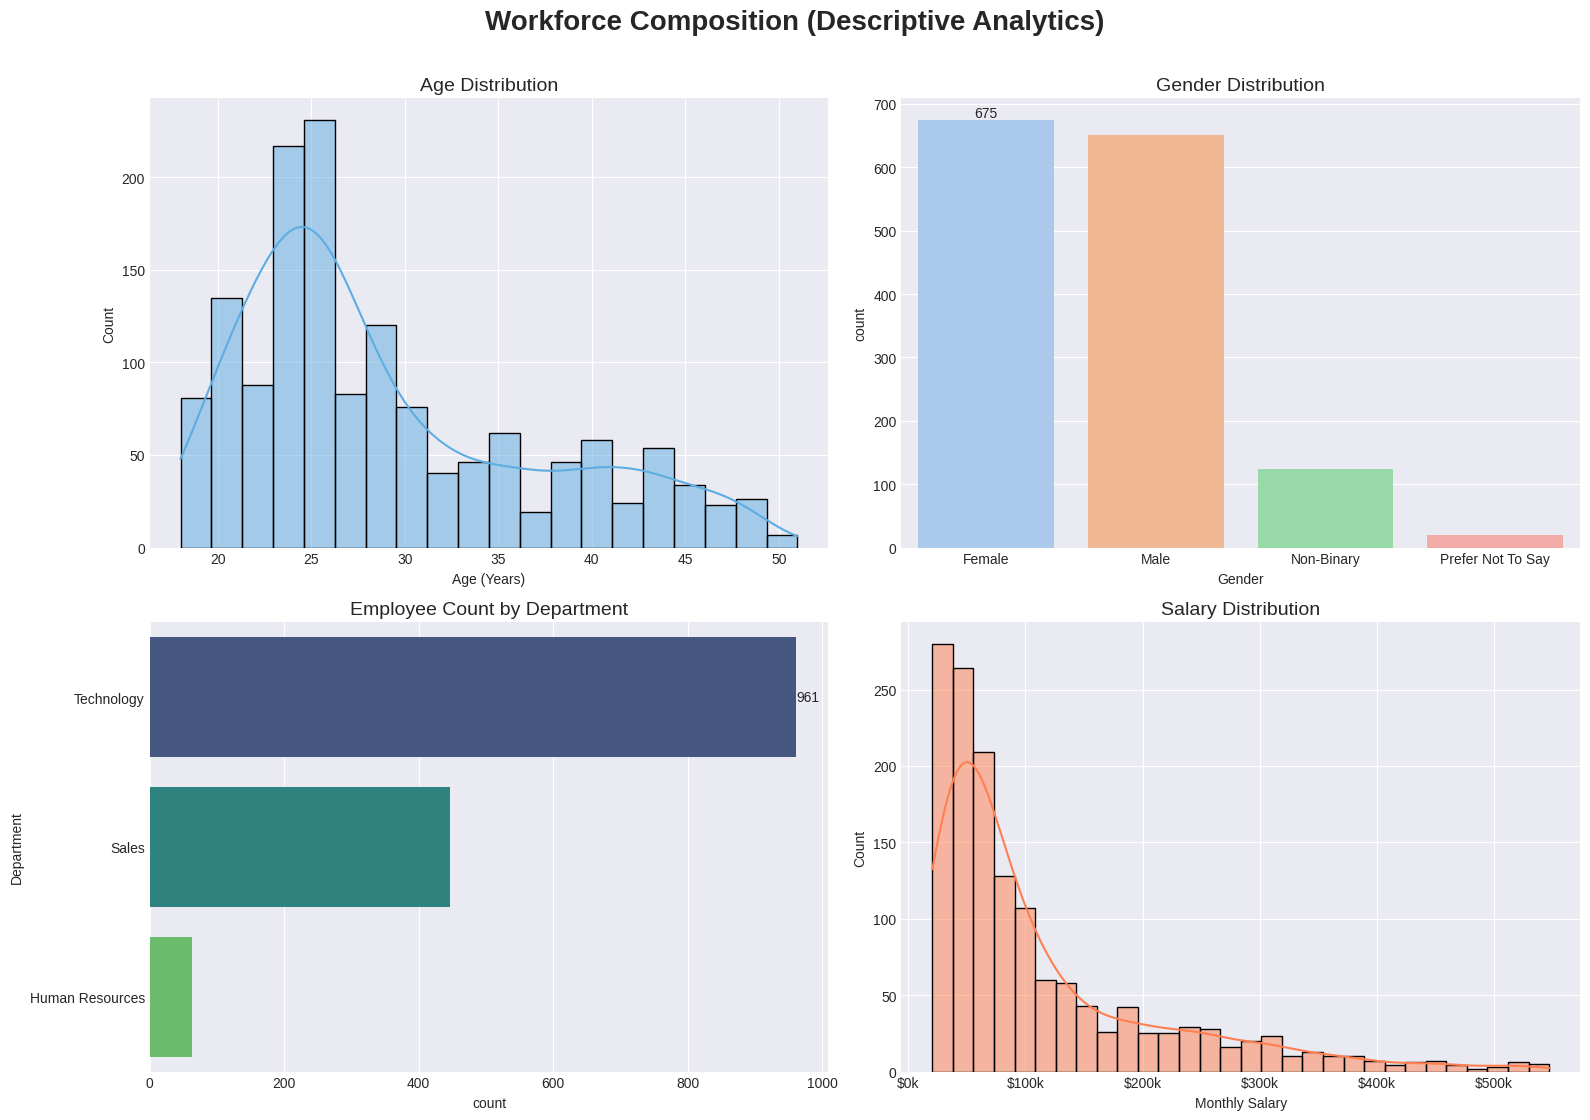

In [ ]:
print("Generating Workforce Composition Description...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Workforce Composition (Descriptive Analytics)', fontsize=20, fontweight='bold', y=0.96)

# --- 1. Age Distribution (Histogram) ---
sns.histplot(data=final_df, x='Age', bins=20, kde=True, ax=axes[0, 0], color='#5DADE2')
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age (Years)')

# --- 2. Gender Distribution (Count Plot) ---
sns.countplot(data=final_df, x='Gender', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Gender Distribution', fontsize=14)
axes[0, 1].bar_label(axes[0, 1].containers[0])

# --- 3. Department Distribution ---
order_dept = final_df['Department'].value_counts().index
sns.countplot(data=final_df, y='Department', ax=axes[1, 0], palette='viridis', order=order_dept)
axes[1, 0].set_title('Employee Count by Department', fontsize=14)
axes[1, 0].bar_label(axes[1, 0].containers[0])

# --- 4. Salary Distribution (Histogram with Currency Format) ---
sns.histplot(data=final_df, x='Salary', bins=30, kde=True, ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Salary Distribution', fontsize=14)

axes[1, 1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
axes[1, 1].set_xlabel('Monthly Salary')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('(1).png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Generating 2x2 Dashboard...


/tmp/ipython-input-2044968097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='Age_Group', y='JobSatisfaction', ax=axes[0,0], palette='viridis')
/tmp/ipython-input-2044968097.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='Education', y='Salary', ax=axes[0,1], palette='plasma')
/tmp/ipython-input-2044968097.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
/tmp/ipython-input-2044968097.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

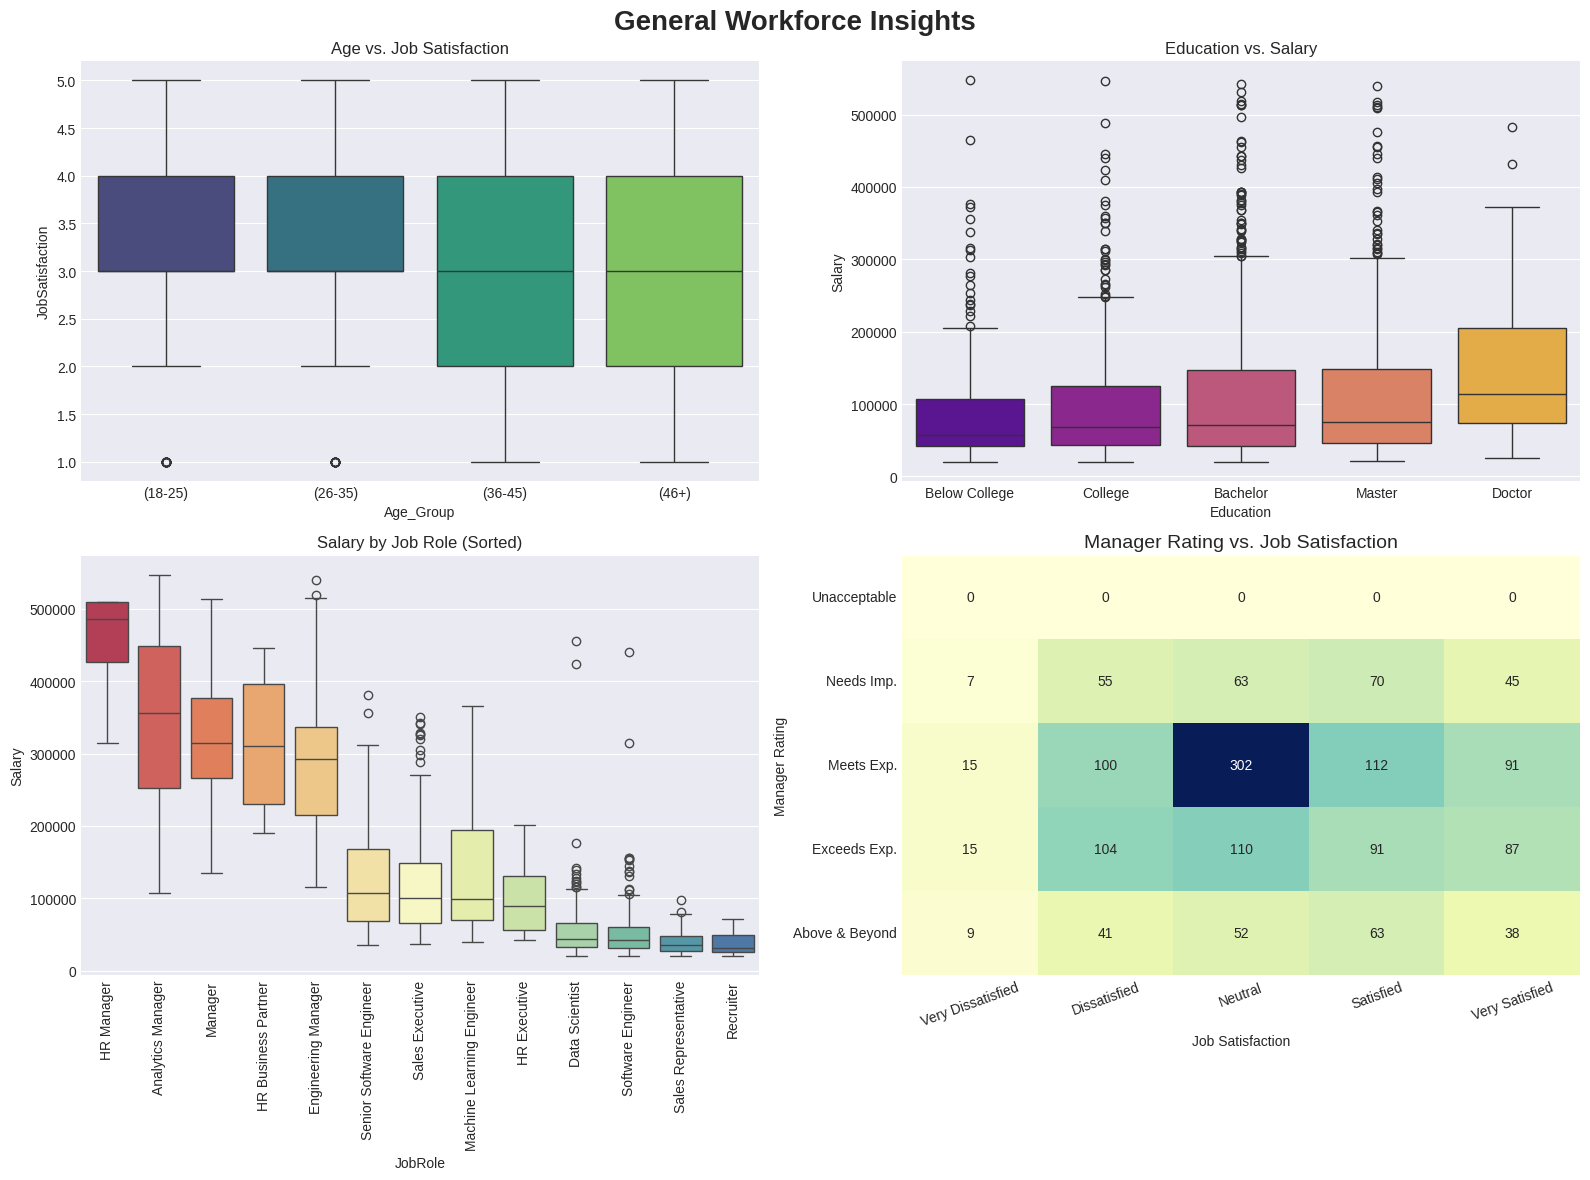

In [ ]:
print("Generating 2x2 Dashboard...")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('General Workforce Insights', fontsize=20, fontweight='bold')

# --- Plot 1: Age Group vs. Job Satisfaction ---
sns.boxplot(data=final_df, x='Age_Group', y='JobSatisfaction', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Age vs. Job Satisfaction')

# --- Plot 2: Education vs. Salary ---
sns.boxplot(data=final_df, x='Education', y='Salary', ax=axes[0,1], palette='plasma')
axes[0,1].set_title('Education vs. Salary')
axes[0,1].set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

# --- Plot 3: Job Role vs. Salary (Sorted) ---
sorted_roles = final_df.groupby('JobRole')['Salary'].median().sort_values(ascending=False).index
sns.boxplot(data=final_df, x='JobRole', y='Salary', order=sorted_roles, ax=axes[1,0], palette='Spectral')
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_title('Salary by Job Role (Sorted)')

# --- Plot 4: Manager Rating vs. Satisfaction (Heatmap) ---
# 1. Force-Fix Data Types
final_df['ManagerRating'] = pd.to_numeric(final_df['ManagerRating'], errors='coerce').fillna(3).astype(int)
final_df['JobSatisfaction'] = pd.to_numeric(final_df['JobSatisfaction'], errors='coerce').fillna(3).astype(int)
sat_order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
perf_order = ['Unacceptable', 'Needs Imp.', 'Meets Exp.', 'Exceeds Exp.', 'Above & Beyond']

# 4. Create Matrix & Reindex
ctab = pd.crosstab(final_df['MgrRating_Label'], final_df['JobSat_Label'])

# Reindex is crucial here to force the order and fill missing categories with 0
ctab = ctab.reindex(index=perf_order, columns=sat_order).fillna(0)
sns.heatmap(ctab, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1, 1], cbar=False)

axes[1, 1].set_title('Manager Rating vs. Job Satisfaction', fontsize=14)
axes[1, 1].set_ylabel('Manager Rating')
axes[1, 1].set_xlabel('Job Satisfaction')
axes[1, 1].tick_params(axis='x', rotation=20)
plt.savefig('(2).png', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

# Attrition Analysis

Generating Attrition Analysis (Pie & Bar Charts)...


/tmp/ipython-input-2309827807.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_rate.index, y=dept_rate.values, ax=axes[1], palette='Reds_r', edgecolor='black')


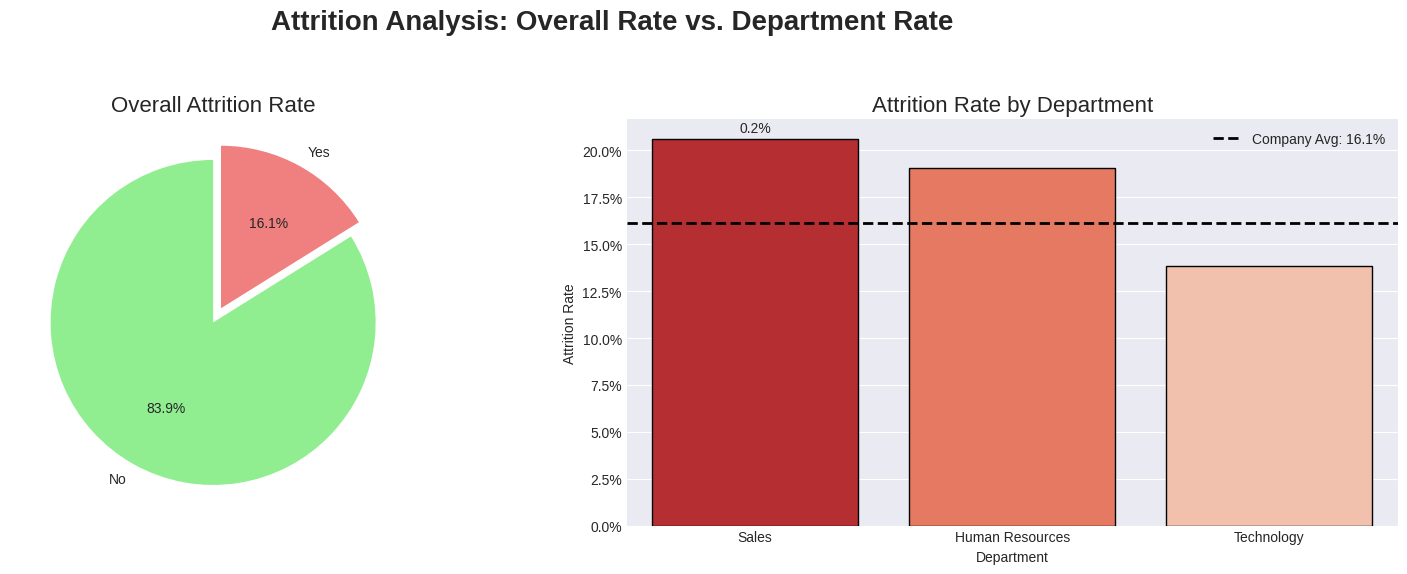

In [ ]:
print("Generating Attrition Analysis (Pie & Bar Charts)...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Analysis: Overall Rate vs. Department Rate', fontsize=20, fontweight='bold')
# --- PLOT 1: Overall Attrition Rate (Pie Chart) ---
attrition_counts = final_df['Attrition'].value_counts()

colors_map = {'No': 'lightgreen', 'Yes': 'lightcoral'}
chart_colors = [colors_map[label] for label in attrition_counts.index]

axes[0].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
            startangle=90, colors=chart_colors, explode=[0, 0.1])
axes[0].set_title('Overall Attrition Rate', fontsize=16)

# --- PLOT 2: Attrition Rate by Department (Bar Chart) ---

dept_rate = final_df.groupby('Department')['Attrition_Target'].mean().sort_values(ascending=False)
# Plot with Semantic Colors (Darker Red = Higher Attrition)
sns.barplot(x=dept_rate.index, y=dept_rate.values, ax=axes[1], palette='Reds_r', edgecolor='black')
overall_rate = final_df['Attrition_Target'].mean()
axes[1].axhline(y=overall_rate, color='black', linestyle='--', linewidth=2, label=f'Company Avg: {overall_rate:.1%}')

# Formatting & Labels
axes[1].set_title('Attrition Rate by Department', fontsize=16)
axes[1].set_ylabel('Attrition Rate')
axes[1].set_xlabel('Department')
axes[1].legend()

# Format Axis & Add Numbers on Bars
from matplotlib.ticker import PercentFormatter
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].bar_label(axes[1].containers[0], fmt='%.1f%%', padding=3)
plt.savefig('(3)', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

Generating Attrition Driver Dashboard ...


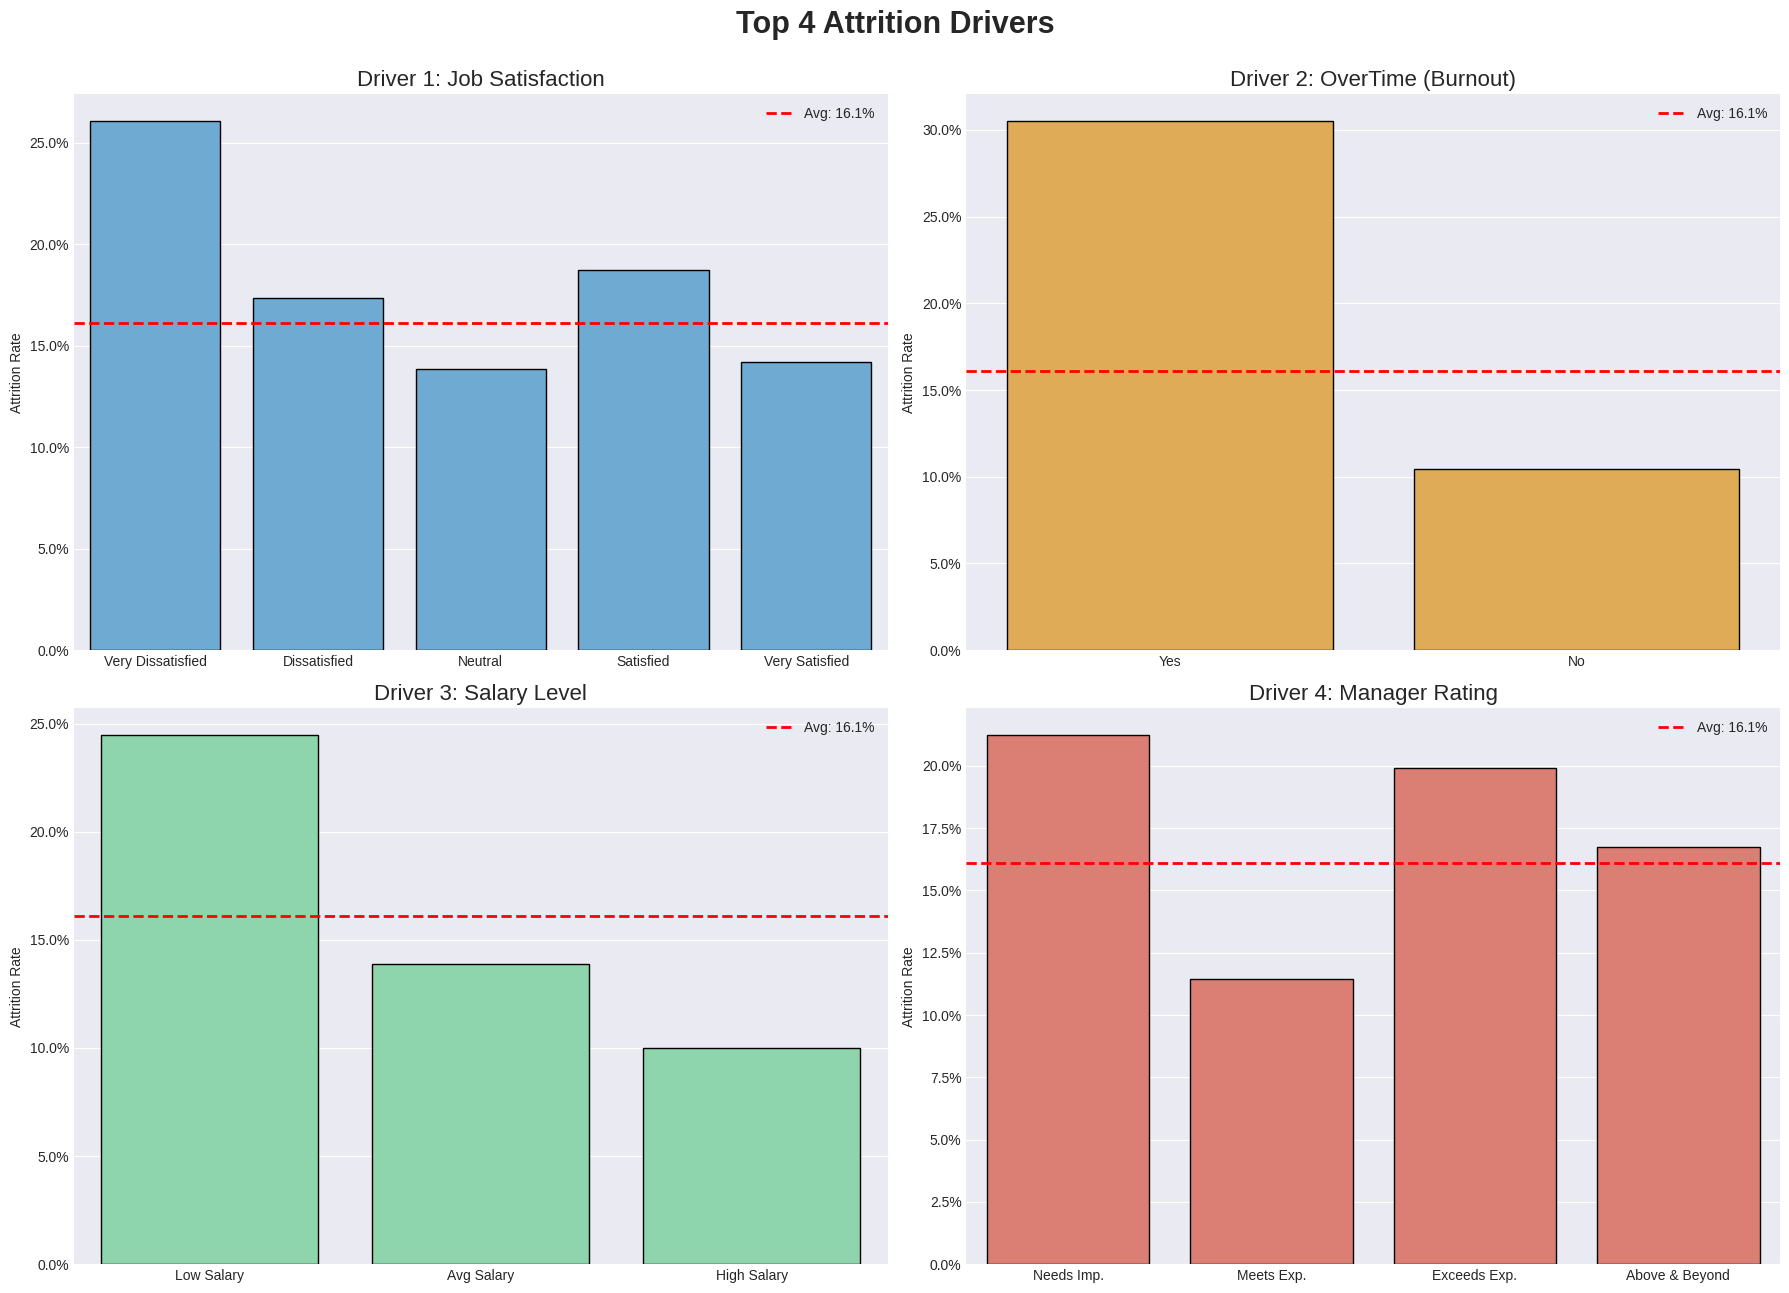

In [ ]:
print("Generating Attrition Driver Dashboard ...")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Top 4 Attrition Drivers', fontsize=22, fontweight='bold', y=0.95)

# Calculate Overall Rate
overall_rate = final_df['Attrition_Target'].mean()

def plot_driver(ax, x_col, title, order=None, color='skyblue'):
    # Seaborn calculates the mean
    sns.barplot(data=final_df, x=x_col, y='Attrition_Target', order=order,
                ax=ax, color=color, edgecolor='black', errorbar=None)

    # Add Reference Line
    ax.axhline(y=overall_rate, color='red', linestyle='--', linewidth=2, label=f'Avg: {overall_rate:.1%}')

    # Formatting
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Attrition Rate')
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.legend(loc='upper right')

# --- PLOT 1: Job Satisfaction ---
order_sat = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
plot_driver(axes[0,0], 'JobSat_Label', 'Driver 1: Job Satisfaction', order_sat, '#5DADE2')

# --- PLOT 2: OverTime ---
plot_driver(axes[0,1], 'OverTime', 'Driver 2: OverTime (Burnout)', ['Yes', 'No'], '#F5B041')

# --- PLOT 3: Salary Level ---
order_sal = ['Low Salary', 'Avg Salary', 'High Salary']
plot_driver(axes[1,0], 'Salary_Bin', 'Driver 3: Salary Level', order_sal, '#82E0AA')

# --- PLOT 4: Manager Rating ---
order_perf = ['Needs Imp.', 'Meets Exp.', 'Exceeds Exp.', 'Above & Beyond']
plot_driver(axes[1,1], 'MgrRating_Label', 'Driver 4: Manager Rating', order_perf, '#EC7063')
plt.savefig('(4)', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating OverTime Rate by Department...


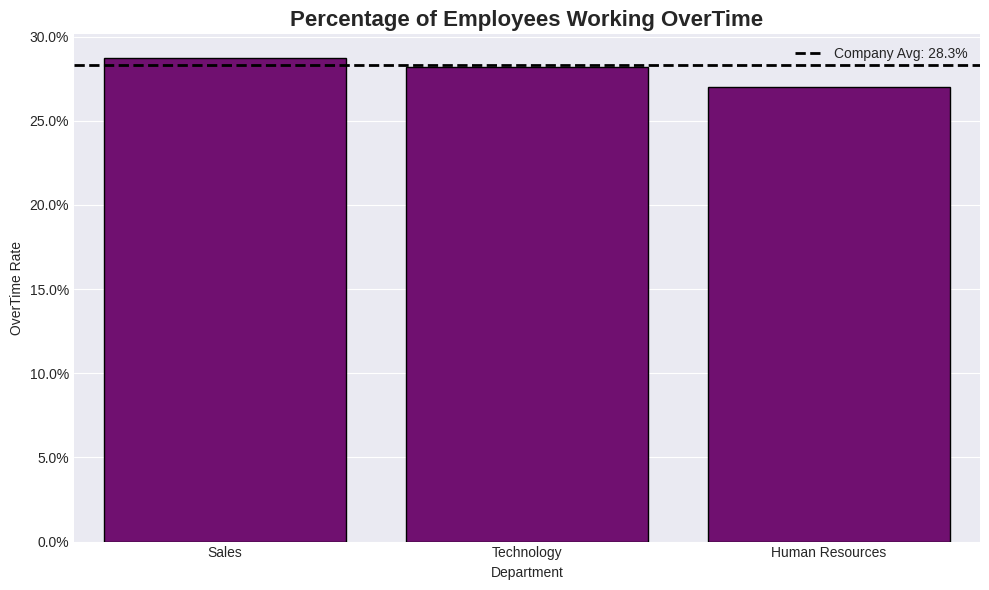

In [ ]:
print("Generating OverTime Rate by Department...")

ot_rate_by_dept = (final_df.groupby('Department')['OverTime']
                   .apply(lambda x: (x == 'Yes').mean())
                   .sort_values(ascending=False))

overall_ot_rate = (final_df['OverTime'] == 'Yes').mean()

plt.figure(figsize=(10, 6))

# 3. Plot
ax = sns.barplot(x=ot_rate_by_dept.index, y=ot_rate_by_dept.values,
                 color='purple', edgecolor='black')

# 4. Reference Line
ax.axhline(y=overall_ot_rate, color='black', linestyle='--', linewidth=2,
           label=f'Company Avg: {overall_ot_rate:.1%}')

# 5. Formatting
plt.title('Percentage of Employees Working OverTime', fontsize=16, fontweight='bold')
plt.ylabel('OverTime Rate')
plt.xlabel('Department')
plt.legend()

# Percentage Format & Labels
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.savefig('(5)', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

Generating Sales Dept Attrition Dashboard...
   Analyzing 446 employees in Sales...


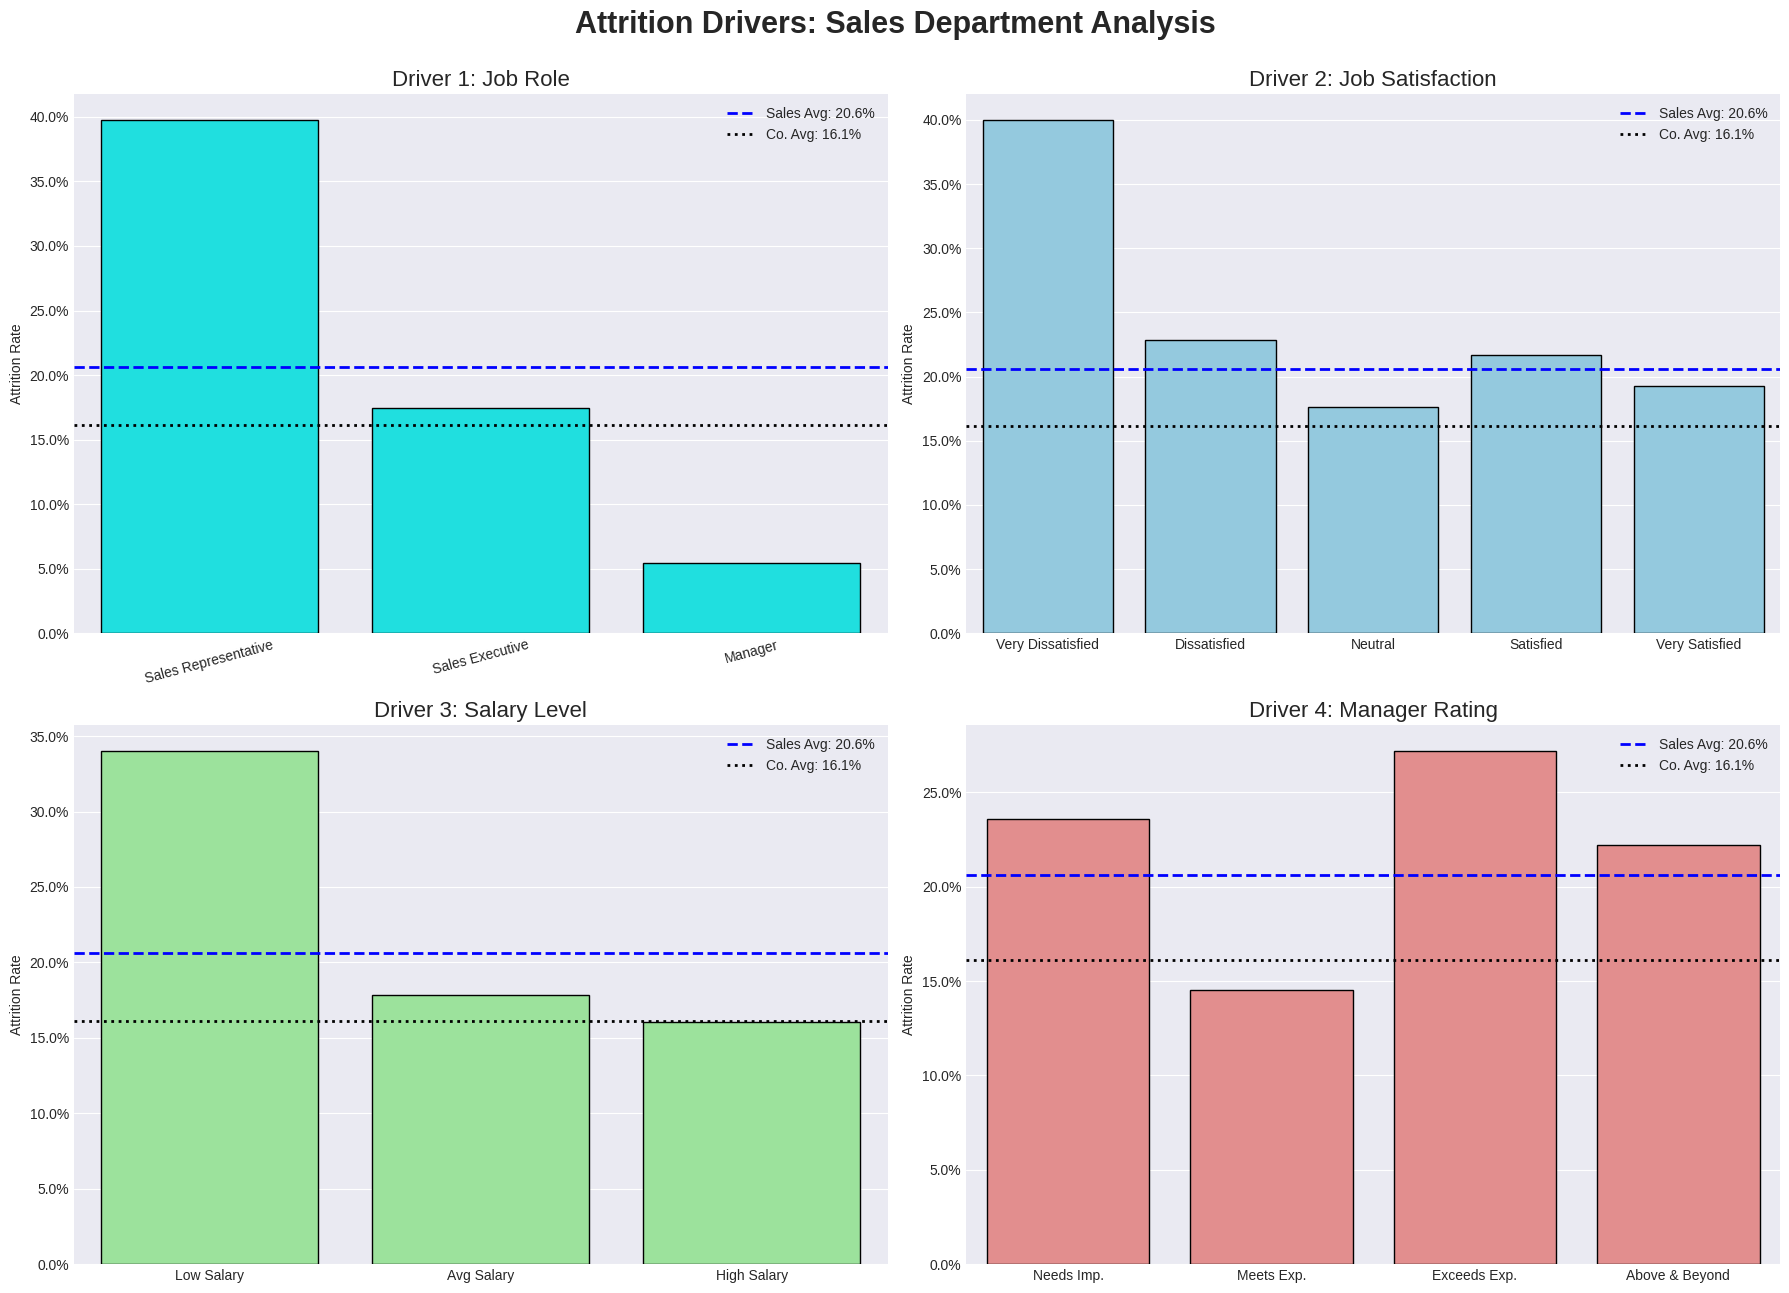

In [ ]:
print("Generating Sales Dept Attrition Dashboard...")

# 1. Filter Data & Calculate Rates
sales_df = final_df[final_df['Department'] == 'Sales']
sales_avg = sales_df['Attrition_Target'].mean()
overall_avg = final_df['Attrition_Target'].mean()

print(f"   Analyzing {len(sales_df)} employees in Sales...")

# 2. Setup Grid
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Attrition Drivers: Sales Department Analysis', fontsize=22, fontweight='bold', y=0.95)

# --- 3. The Magic Helper Function (Reusability) ---
def plot_sales_driver(ax, x_col, title, order=None, color='cyan'):
    # Draw Bar Chart
    sns.barplot(data=sales_df, x=x_col, y='Attrition_Target', order=order,
                ax=ax, color=color, edgecolor='black', errorbar=None)

    # Add TWO Reference Lines (Context)
    ax.axhline(y=sales_avg, color='blue', linestyle='--', linewidth=2, label=f'Sales Avg: {sales_avg:.1%}')
    ax.axhline(y=overall_avg, color='black', linestyle=':', linewidth=2, label=f'Co. Avg: {overall_avg:.1%}')

    # Formatting
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Attrition Rate')
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.legend(loc='upper right')

# --- 4. Generate Plots ---

# PLOT 1: Job Role (Sorted by Risk)
role_order = sales_df.groupby('JobRole')['Attrition_Target'].mean().sort_values(ascending=False).index
plot_sales_driver(axes[0,0], 'JobRole', 'Driver 1: Job Role', role_order, 'cyan')
axes[0,0].tick_params(axis='x', rotation=15)

# PLOT 2: Job Satisfaction
order_sat = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
plot_sales_driver(axes[0,1], 'JobSat_Label', 'Driver 2: Job Satisfaction', order_sat, 'skyblue')

# PLOT 3: Salary Level
order_sal = ['Low Salary', 'Avg Salary', 'High Salary']
plot_sales_driver(axes[1,0], 'Salary_Bin', 'Driver 3: Salary Level', order_sal, 'lightgreen')

# PLOT 4: Manager Rating
order_perf = ['Needs Imp.', 'Meets Exp.', 'Exceeds Exp.', 'Above & Beyond']
plot_sales_driver(axes[1,1], 'MgrRating_Label', 'Driver 4: Manager Rating', order_perf, 'lightcoral')
plt.savefig('(6)', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating Job Satisfaction by Role (Filtered for Significance)...
Removed roles with < 20 employees. Analyzing 11 major roles.


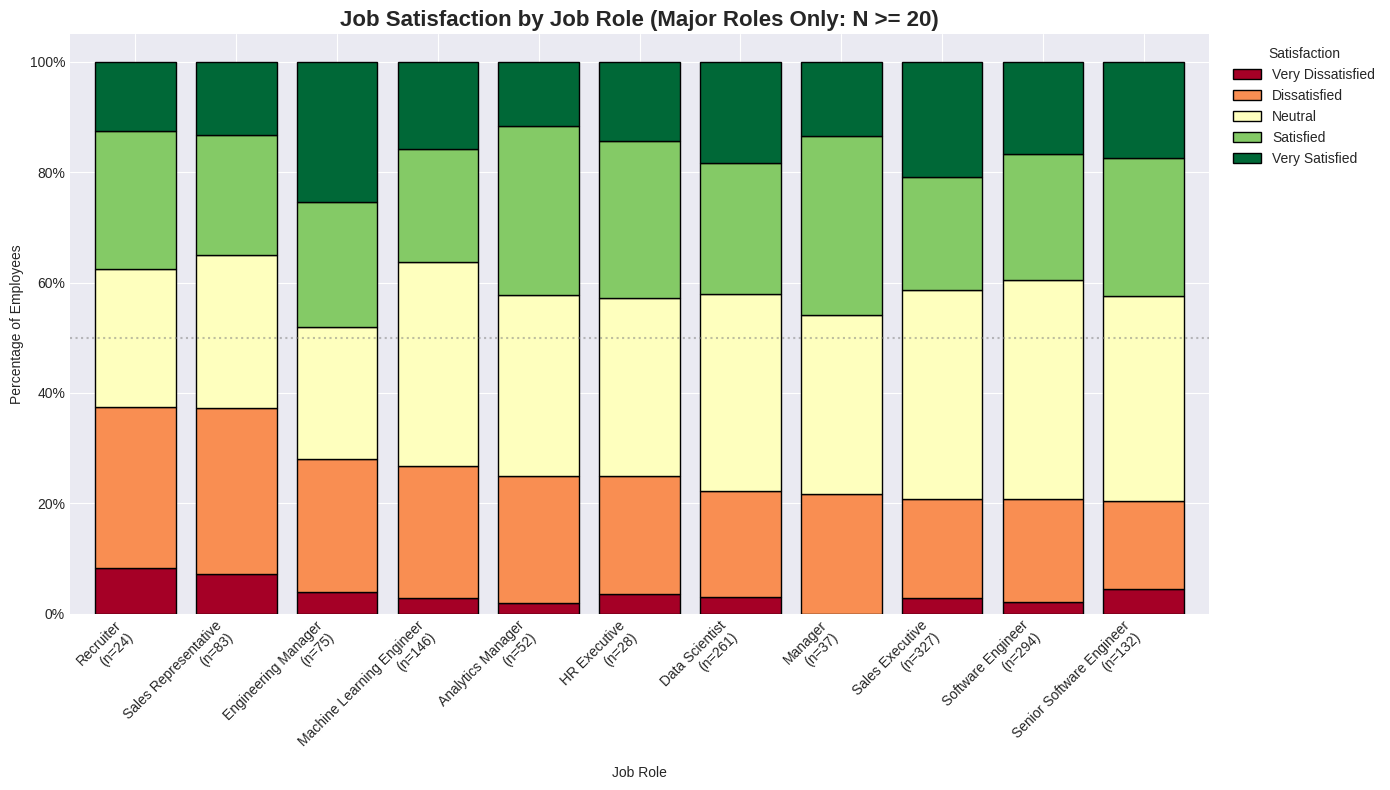

In [ ]:
print("Generating Job Satisfaction by Role (Filtered for Significance)...")

from matplotlib.ticker import PercentFormatter

# --- 1. Filter out Small Roles ---
role_counts = final_df['JobRole'].value_counts()

# بنختار بس الوظائف اللي فيها أكتر من 20 موظف عشان النسبة تكون ليها معنى
# ده هيشيل الـ HR Manager (4) والـ HR Business Partner (7) اللي عاملين الشوشرة
significant_roles = role_counts[role_counts >= 20].index
df_filtered = final_df[final_df['JobRole'].isin(significant_roles)]

print(f"Removed roles with < 20 employees. Analyzing {len(significant_roles)} major roles.")

# --- 2. Prepare Data ---
role_sat = pd.crosstab(df_filtered['JobRole'], df_filtered['JobSat_Label'], normalize='index')

# --- 3. Reorder & Sort ---
sat_order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
role_sat = role_sat.reindex(columns=sat_order)

role_sat['Unhappy_Score'] = role_sat['Very Dissatisfied'] + role_sat['Dissatisfied']
role_sat = role_sat.sort_values(by='Unhappy_Score', ascending=False)
plot_data = role_sat.drop(columns='Unhappy_Score')

# --- 4. Plot ---
ax = plot_data.plot(kind='bar', stacked=True, figsize=(14, 8),
                    colormap='RdYlGn', edgecolor='black', width=0.8)

# --- 5. Formatting ---
plt.title('Job Satisfaction by Job Role (Major Roles Only: N >= 20)', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Employees')
plt.xlabel('Job Role')
plt.legend(title='Satisfaction', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)

# Add sample size (N) to x-axis labels
new_labels = [f"{role}\n(n={role_counts[role]})" for role in plot_data.index]
ax.set_xticklabels(new_labels, rotation=45, ha='right')
plt.savefig('(7)', dpi=300, bbox_inches='tight', transparent=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()
plt.show()

# Classification model

## Prerocessing

In [ ]:
print("Feature Engineering & Preprocessing...")

# 1. Define Columns based on type
# Ordinal/Numeric columns (Keep order: 1 < 2 < 3)
numeric_cols = [
    'Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany',
    'Education', 'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel',
    'ManagerRating', 'SelfRating'
]

# Nominal columns (No order -> Need One-Hot Encoding)
categorical_cols = [
    'Department', 'JobRole', 'MaritalStatus', 'OverTime'
]

# 2. Select Data
X = final_df[numeric_cols + categorical_cols].copy()
y = final_df['Attrition_Target']

# 3. Apply One-Hot Encoding (Get Dummies)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Features ready! Final X shape: {X.shape}")

Feature Engineering & Preprocessing...
Features ready! Final X shape: (1470, 29)


# Splitting

In [ ]:
print("Splitting Data")

# Stratify=y ensures both sets have the same % of attrition (16%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Data: {X_train.shape[0]} rows")
print(f"Testing Data:  {X_test.shape[0]} rows")

Splitting Data
Training Data: 1176 rows
Testing Data:  294 rows


# Training

In [ ]:
print("Training Logistic Regression...")
weights = {0: 1, 1: 3.5}
# solver='liblinear': Good for smaller datasets
model = LogisticRegression(max_iter=2000, class_weight=weights
                           , solver='liblinear',C=0.5,penalty="l1")

model.fit(X_train, y_train)
print("Model trained successfully!")

Training Logistic Regression...
Model trained successfully!


# Evaluation

In [ ]:
print("Model Evaluation...")

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.1%}")
print("\n--- Detailed Report ---")
print(classification_report(y_test, y_pred))

Model Evaluation...
Accuracy: 75.9%

--- Detailed Report ---
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       247
           1       0.34      0.55      0.42        47

    accuracy                           0.76       294
   macro avg       0.62      0.68      0.64       294
weighted avg       0.81      0.76      0.78       294



# Top Features from the model results

/tmp/ipython-input-406124561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefs, x='Weight', y='Feature', palette=colors)


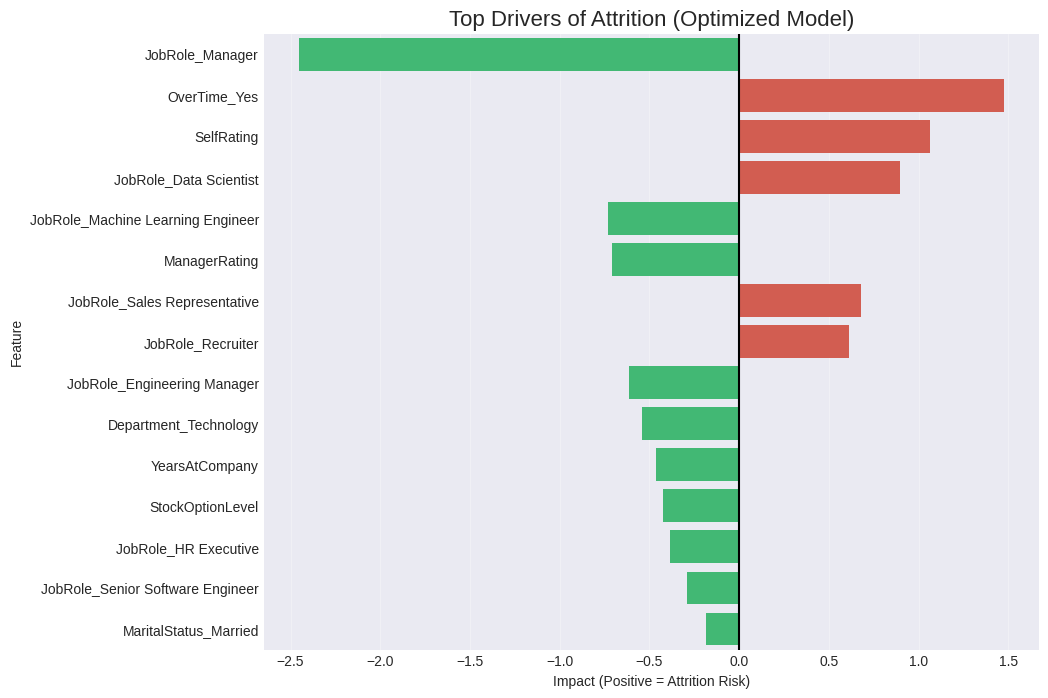

In [ ]:
# 5. New Coefficients Plot (AnCleaner Version)
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_[0],
    'Abs_Weight': abs(model.coef_[0])
}).sort_values(by='Abs_Weight', ascending=False).head(15)

plt.figure(figsize=(10, 8))
colors = ['#E74C3C' if x > 0 else '#2ECC71' for x in coefs['Weight']]
sns.barplot(data=coefs, x='Weight', y='Feature', palette=colors)
plt.title('Top Drivers of Attrition (Optimized Model)', fontsize=16)
plt.xlabel('Impact (Positive = Attrition Risk)')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black')
plt.savefig('(8)', dpi=300, bbox_inches='tight', transparent=True)
plt.show()




1
11
1
1
1
1

1
1
1
1
1
1

1
1

1








1
1
1
1
1
1
1


1111
1
1
1
1
1
1





